## Xray Lung Classifier 

In [1]:
#!pip install numpy --upgrade

---
### Project flow  

1) Importing the libraries and Loading the Images

2) Exploring the Images and transforming the Images

3) Creating the model Architecture

4) Training the Data

5) Evaluate the Model 

In [2]:
# pip install numpy matplotlib pillow ipython
# pip install torch torchvision torchaudio
# pip install tqdm torchsummary
# pip install opencv-python   # only if you want cv2

---
### Importing the libraries and Loading the Images

In [1]:
from matplotlib import pyplot as plt

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from torchsummary import summary

In [5]:
#!pip install torchsummary


In [3]:
data_path = r"C:\Users\ASUS\Downloads\Lung disease x Ray classification\Data"

In [4]:
data_path

'C:\\Users\\ASUS\\Downloads\\Lung disease x Ray classification\\Data'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use the data_path defined earlier
datagen = ImageDataGenerator(rescale=1./255)

data = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'   # binary because there are 2 classes
)


Found 5856 images belonging to 2 classes.


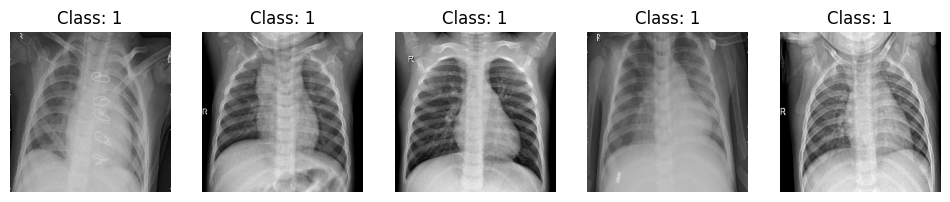

In [6]:
import matplotlib.pyplot as plt

# Get one batch of images and labels
images, labels = next(data)

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {int(labels[i])}")  # labels are 0 or 1
    plt.axis("off")

plt.show()


---
### Exploring the Images and transforming the Images

In [7]:
import os

# Defining the class names
class_name = ['NORMAL', 'PNEUMONIA']

# Function to get list of files
def get_list_of_files(dir_name):
    '''
    input - The input directory location
    output - Returns the list of files in the directory
    '''
    files_list = os.listdir(dir_name)
    return files_list

files_list_normal_train = get_list_of_files(os.path.join(data_path, 'train', class_name[0]))
files_list_pneumonia_train = get_list_of_files(os.path.join(data_path, 'train', class_name[1]))
files_list_normal_test = get_list_of_files(os.path.join(data_path, 'test', class_name[0]))
files_list_pneumonia_test = get_list_of_files(os.path.join(data_path, 'test', class_name[1]))


In [8]:
print("Number of train samples in Normal category {}".format(len(files_list_normal_train)))
print("Number of train samples in Pneumonia category {}".format(len(files_list_pneumonia_train)))
print("Number of test samples in Normal category {}".format(len(files_list_normal_test)))
print("Number of test samples in Pneumonia category {}".format(len(files_list_pneumonia_test)))

Number of train samples in Normal category 1266
Number of train samples in Pneumonia category 3418
Number of test samples in Normal category 317
Number of test samples in Pneumonia category 855


---
### Exploring the images 

- Let's print the Normal and Pneumonia images from Training folder 

Image shape: (747, 1223, 3)


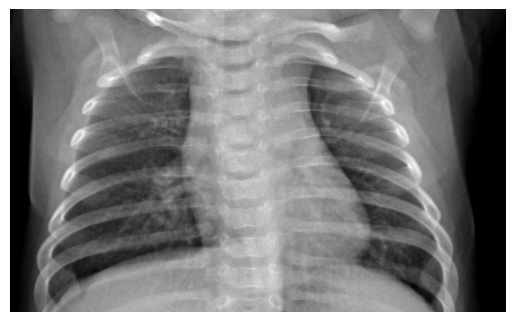

In [9]:
import numpy as np
import matplotlib.image as mpimg
import os

# Pick a random image from NORMAL train set
rand_img_no = np.random.randint(0, len(files_list_normal_train))
img_path = os.path.join(data_path, 'train', 'NORMAL', files_list_normal_train[rand_img_no])

# Load and display the image
img = mpimg.imread(img_path)
print("Image shape:", img.shape)
plt.imshow(img)
plt.axis("off")
plt.show()


Image shape: (1048, 1344, 3)


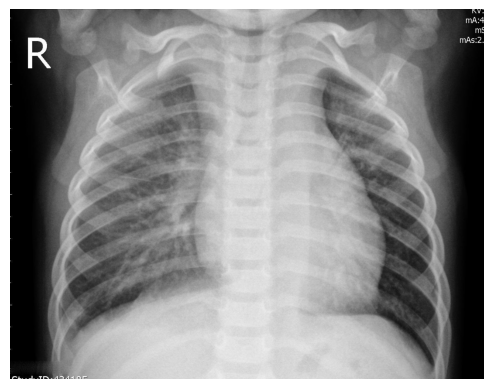

In [10]:
# Pick a random image from PNEUMONIA train set
rand_img_no = np.random.randint(0, len(files_list_pneumonia_train))
img_path = os.path.join(data_path, 'train', 'PNEUMONIA', files_list_pneumonia_train[rand_img_no])

# Load and display the image
img = mpimg.imread(img_path)
print("Image shape:", img.shape)
plt.imshow(img)
plt.axis("off")
plt.show()


### Insights 

- If we run the above cell mutiple times we can see that the images are of different shapes for the 'NORMAL' and 'PNEUMONIA' images in the **train** folder.

Image shape: (1758, 2114, 3)


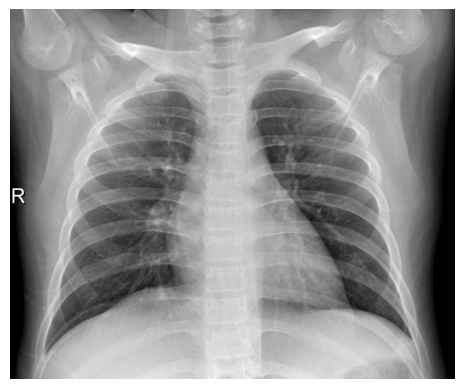

In [11]:
# Pick a random image from NORMAL test set
rand_img_no = np.random.randint(0, len(files_list_normal_test))
img_path = os.path.join(data_path, 'test', 'NORMAL', files_list_normal_test[rand_img_no])

# Load and display the image
img = mpimg.imread(img_path)
print("Image shape:", img.shape)
plt.imshow(img)
plt.axis("off")
plt.show()


Image shape: (1144, 1480, 3)


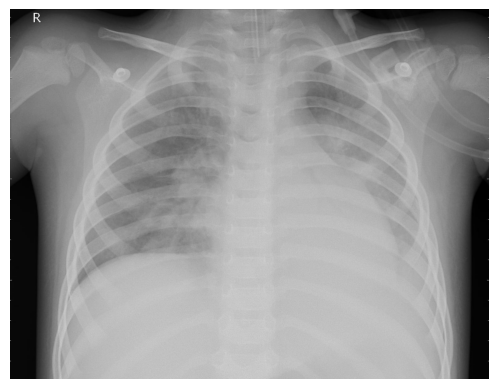

In [12]:
# Pick a random image from PNEUMONIA test set
rand_img_no = np.random.randint(0, len(files_list_pneumonia_test))
img_path = os.path.join(data_path, 'test', 'PNEUMONIA', files_list_pneumonia_test[rand_img_no])

# Load and display the image
img = mpimg.imread(img_path)
print("Image shape:", img.shape)
plt.imshow(img)
plt.axis("off")
plt.show()


### Insights 

- If we run the above cell mutiple times we can see that the images are of different shapes for the 'NORMAL' and 'PNEUMONIA' images in the **test** folder.

### Transforming the Images 

- Now that we have seen the sample of the images let's transform the data now 
- We need to perform transformation on both train and test images 
- For Training data we need to perform the data augmentation also.
- Data Augmentation is done to create synthetic data.

In **Transformation** we are doing Resize,CenterCrop,ColorJitter,RandomHorizontalFlip,RandomRotation,ToTensor and Normalize.

- Resize:- Resize the input image to the given size.
- CenterCrop:- Crops the given image at the center.
- ColorJitter:- Randomly change the brightness, contrast, saturation and hue of an image.
- RandomHorizontalFlip:- Horizontally flip the given image randomly with a given probability.
- RandomRotation:- Rotate the image by angle.
- ToTensor:- Convert numpy.ndarray to tensor.
- Normalize:- Normalize a float tensor image with mean and standard deviation.

In [13]:
from torchvision import transforms

# Transformations for training set
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Transformations for test set
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


### Creating Data Loader

- For our usecase will be using the default data loader for Pytorch.
- We will be creating 2 data loaders one for the training data and other for the test data.
- batch size is a hyperparameter which we can tweak according to our need and system configuration.
- We can provide Image shuffling True for training data and False for test data.
- Pin memory is used to transfer the loaded dataset from CPU to GPU. 

In [14]:
from torchvision import datasets
from torch.utils.data import DataLoader

# Load datasets
train_data = datasets.ImageFolder(os.path.join(data_path, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(data_path, 'test'), transform=test_transform)

# Data loaders
train_loader = DataLoader(train_data,
                          batch_size=2, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_data,
                         batch_size=2, shuffle=False, pin_memory=True)

# Class names and dataset sizes
class_names = train_data.classes
print("Classes:", class_names)
print(f'Number of train images: {len(train_data)}')
print(f'Number of test images: {len(test_data)}')


Classes: ['NORMAL', 'PNEUMONIA']
Number of train images: 4684
Number of test images: 1172


---
### Creating the model Architecture

- First Layer is the **input layer** consisting of 3 input channels and output channels with kernel_size of 3X3, padding=0 and bias=True. The activation function we are using is ReLU and performing batch normalization.
- Then we are performing max pooling to extract the important features out of the image.
- Similarly we are passing our model through 9 convolutional layers.
- Finally we are passing out passing our model through a output layer in which we are getting binary classification.


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        """
        Creating custom CNN architecture for Image classification
        """
        super(Net, self).__init__()
        # Input Block
        self.convolution_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3),
                      padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(8)
        )
        self.pooling11 = nn.MaxPool2d(2, 2)
        # CONVOLUTION BLOCK 1
        self.convolution_block2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=20, kernel_size=(3, 3),
                      padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        self.pooling22 = nn.MaxPool2d(2, 2)
        self.convolution_block3 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10),
        )
        self.pooling33 = nn.MaxPool2d(2, 2)
        # CONVOLUTION BLOCK 2
        self.convolution_block4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        self.convolution_block5 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=32, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(32),
        )
        self.convolution_block6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )
        self.convolution_block7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )
        self.convolution_block8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=14, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(14)
        )
        self.convolution_block9 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=16, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)
        )
        self.convolution_block_out = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=2, kernel_size=(4, 4), padding=0, bias=True),
        )

    def forward(self, x):
        x = self.convolution_block1(x)
        x = self.pooling11(x)
        x = self.convolution_block2(x)
        x = self.pooling22(x)
        x = self.convolution_block3(x)
        x = self.pooling33(x)
        x = self.convolution_block4(x)
        x = self.convolution_block5(x)
        x = self.convolution_block6(x)
        x = self.convolution_block7(x)
        x = self.convolution_block8(x)
        x = self.convolution_block9(x)
        x = self.gap(x)
        x = self.convolution_block_out(x)
        x = x.view(-1, 2)   # reshape
        return torch.sigmoid(x)


In [19]:
# !pip show numpy

In [18]:
# To check weather cuda is available in the system or not 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Available processor {}".format(device))
model = Net().to(device)
# To check the model summary
summary(model, input_size=(3, 224, 224))

Available processor cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 222, 222]             224
              ReLU-2          [-1, 8, 222, 222]               0
       BatchNorm2d-3          [-1, 8, 222, 222]              16
         MaxPool2d-4          [-1, 8, 111, 111]               0
            Conv2d-5         [-1, 20, 109, 109]           1,460
              ReLU-6         [-1, 20, 109, 109]               0
       BatchNorm2d-7         [-1, 20, 109, 109]              40
         MaxPool2d-8           [-1, 20, 54, 54]               0
            Conv2d-9           [-1, 10, 54, 54]             210
             ReLU-10           [-1, 10, 54, 54]               0
      BatchNorm2d-11           [-1, 10, 54, 54]              20
        MaxPool2d-12           [-1, 10, 27, 27]               0
           Conv2d-13           [-1, 20, 25, 25]           1,820
             Re

---
### Training the Data

In [19]:
from tqdm import tqdm
import torch
import torch.nn.functional as F

train_losses = []
test_losses = []
train_acc = []
test_acc = []

# Use CrossEntropyLoss (model output should be raw logits, no sigmoid)
criterion = torch.nn.CrossEntropyLoss()

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        y_pred = model(data)
        loss = criterion(y_pred, target)
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        pred = y_pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        pbar.set_description(f'Loss={loss.item():.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:.2f}')
        train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item() * data.size(0)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    acc = 100. * correct / len(test_loader.dataset)
    test_acc.append(acc)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({acc:.2f}%)\n')


In [20]:
import torch

# Use GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [24]:
import torch
from torch.optim.lr_scheduler import StepLR

# Defining the params for training 
model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)
# Please increse the no. of EPOCHS for better Accuracy
EPOCHS = 3

# Training the model
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    print('Current Learning Rate:', optimizer.state_dict()["param_groups"][0]["lr"])
    test(model, device, test_loader)


EPOCH: 0


  0%|          | 0/2342 [00:00<?, ?it/s]c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Loss=0.3136 Batch_id=2341 Accuracy=88.60: 100%|██████████| 2342/2342 [04:33<00:00,  8.57it/s]


Current Learning Rate: 0.01

Test set: Average loss: 0.4045, Accuracy: 1068/1172 (91.13%)

EPOCH: 1


Loss=0.8408 Batch_id=2341 Accuracy=91.23: 100%|██████████| 2342/2342 [03:53<00:00, 10.03it/s]


Current Learning Rate: 0.01

Test set: Average loss: 0.3731, Accuracy: 1103/1172 (94.11%)

EPOCH: 2


Loss=0.8133 Batch_id=2341 Accuracy=92.02: 100%|██████████| 2342/2342 [04:35<00:00,  8.49it/s]


Current Learning Rate: 0.01

Test set: Average loss: 0.3852, Accuracy: 1083/1172 (92.41%)

EPOCH: 3


Loss=0.3133 Batch_id=2341 Accuracy=92.68: 100%|██████████| 2342/2342 [04:54<00:00,  7.94it/s]


Current Learning Rate: 0.01

Test set: Average loss: 0.3705, Accuracy: 1104/1172 (94.20%)

EPOCH: 4


Loss=0.3133 Batch_id=811 Accuracy=92.49:  35%|███▍      | 812/2342 [01:43<03:15,  7.84it/s]


KeyboardInterrupt: 

### Evaluate the Model 

- Plotting the graph for taining loss and training accuracy
- Plotting the graph for test loss and test accuracy 

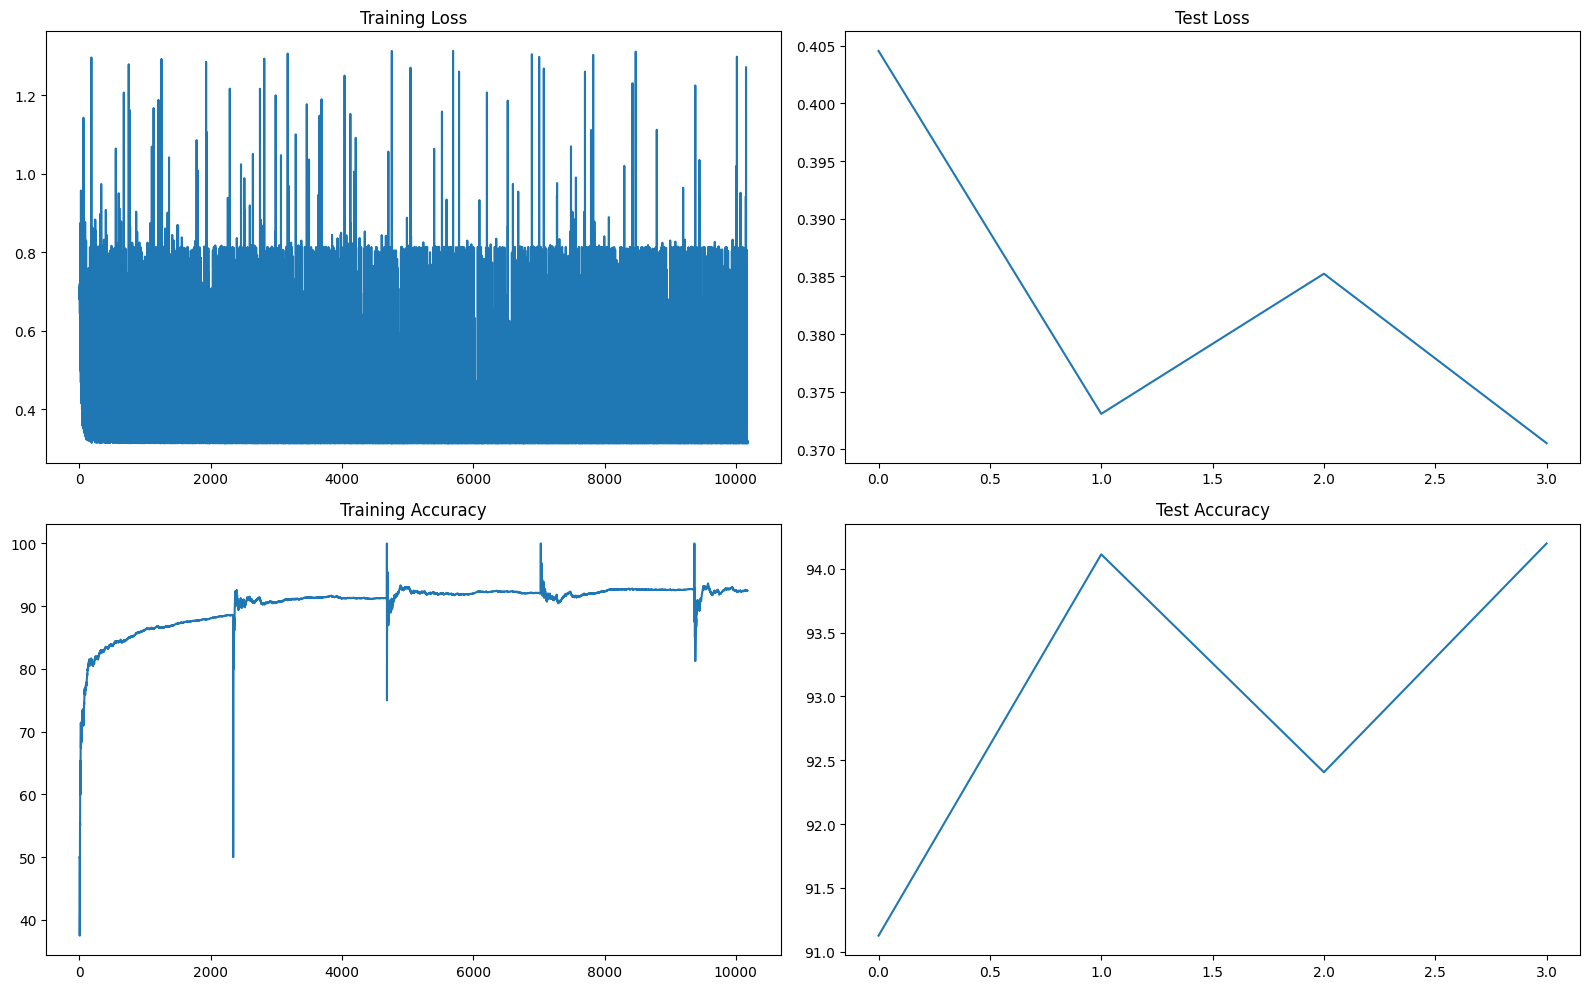

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Training Loss
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")

# Training Accuracy
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")

# Test Loss
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")

# Test Accuracy
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

plt.tight_layout()
plt.show()


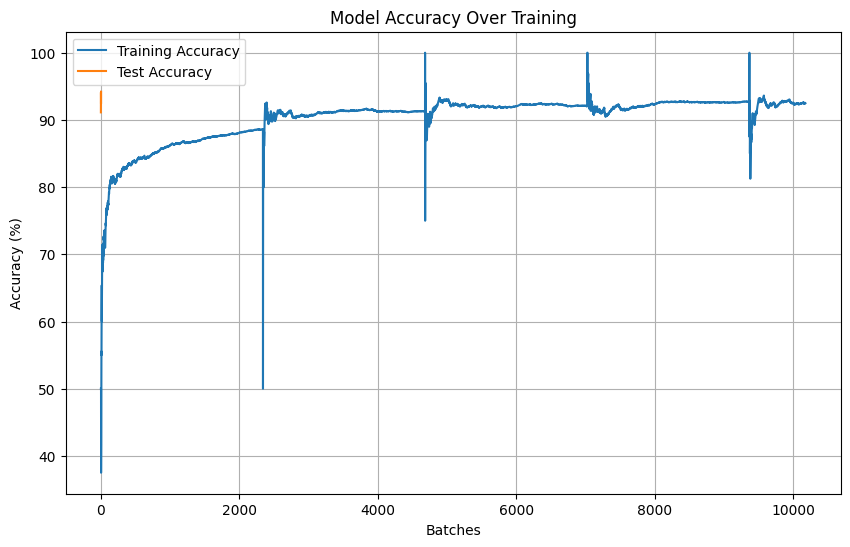

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(train_acc, label="Training Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Batches")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Over Training")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
print(f"Final Training Accuracy: {train_acc[-1]:.2f}%")
print(f"Final Test Accuracy: {test_acc[-1]:.2f}%")


Final Training Accuracy: 92.49%
Final Test Accuracy: 94.20%


### Insights

- As we can see from the above graph that training loss has many fluctuation at the start but then it consolidates over a period of time.
- From the training accuracy graph we are able to get a training accuracy of around 50% throughout
- Test loss graph decreases as the number of epochs increases.
- test accuracy remains constant at around 50%.

In [28]:
torch.save(model, "xray_model_full.pth")


In [ ]:
"""
Project: Lung Disease Classification (X-ray Images)

Model: Custom Deep CNN for Binary Image Classification

Description:
- Input: 224x224 RGB X-ray images
- Architecture:
    - 9 Convolutional Blocks: Conv2d -> ReLU -> BatchNorm
    - MaxPool2d layers for downsampling
    - Color and spatial feature extraction through multiple kernels
    - Global Average Pooling (GAP) at the end
    - Final convolution layer outputs 2 logits (for NORMAL vs PNEUMONIA)
- Output: 2 logits corresponding to the two classes
- Loss Function: CrossEntropyLoss
- Optimizer: SGD with momentum and StepLR scheduler
- Purpose: Classify X-ray images as NORMAL or PNEUMONIA

Notes:
- The final output uses raw logits (no sigmoid) for compatibility with CrossEntropyLoss.
- Training and test accuracy are recorded per epoch.
"""
